In [14]:
import pandas as pd

df_loaded = pd.read_pickle('experiment_results2.pkl')

In [20]:
df_loaded.columns

Index(['experiment_id', 'timestamp', 'function', 'optimizer', 'learning_rate',
       'start_point', 'start_x', 'start_y', 'final_point', 'final_x',
       'final_y', 'final_value', 'iterations', 'runtime', 'converged', 'path',
       'path_array'],
      dtype='object')

In [21]:
df_loaded


columns_to_save = ["optimizer", "learning_rate", "start_x", "start_y", "function", "final_point", "iterations", "runtime", "converged"]
df_subset = df_loaded[columns_to_save]
df_subset.to_csv('experiment_results_subset.csv', index=False)
print(f"Saved {len(df_subset)} rows with columns: {columns_to_save}")


Saved 144 rows with columns: ['optimizer', 'learning_rate', 'start_x', 'start_y', 'function', 'final_point', 'iterations', 'runtime', 'converged']


In [3]:

unique_functions = df_loaded['function'].unique()
print("Unique functions:", unique_functions)


Unique functions: ['convex' 'rosenbrock' 'multimodal']


In [4]:
import matplotlib.pyplot as plt
from Project1 import *
import numpy as np

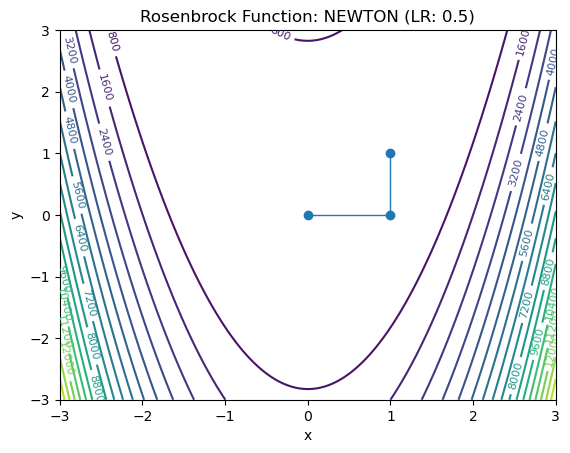

In [5]:


def plot_contours_with_given_path(
        f: C1Differentiable,
        path: np.ndarray,
        xlim: tuple[int, int] = (-3, 3),
        ylim: tuple[int, int] = (-3, 3),
        levels: int = 20,
        title: str = ""
    ):
    xs = np.linspace(xlim[0], xlim[1], 400)
    ys = np.linspace(ylim[0], ylim[1], 400)
    X, Y = np.meshgrid(xs, ys)
    Z = np.zeros_like(X)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = f.forward((X[i, j], Y[i, j]))
    
    plt.figure()
    cs = plt.contour(X, Y, Z, levels=levels)
    plt.clabel(cs, inline=1, fontsize=8)
    
    if len(path) > 0:
        P = np.asarray(path)
        plt.plot(P[:,0], P[:,1], marker='o', linewidth=1)
    
    plt.title(title)
    plt.xlabel('x'); plt.ylabel('y')
    plt.show()


index = 51

path = df_loaded.iloc[index].path_array
diff_function = df_loaded.iloc[index]['function']
optimizer = df_loaded.iloc[index].optimizer
lr = df_loaded.iloc[index].learning_rate if 'learning_rate' in df_loaded.columns else 'N/A'

if diff_function == 'convex':
    f = ConvexBowl()
elif diff_function == 'rosenbrock':
    f = Rosenbrock()
elif diff_function == 'multimodal':
    f = CosineBumps()
else:
    f = ConvexBowl()  

plot_contours_with_given_path(
    f, 
    path, 
    title=f"{diff_function.title()} Function: {optimizer.upper()} (LR: {lr})"
)

In [6]:
df_loaded.iloc[23]

experiment_id                                                   24
timestamp                               2025-09-17T21:32:40.254379
function                                                    convex
optimizer                                                     adam
learning_rate                                                 0.01
start_point                                            (0.5, -1.5)
start_x                                                        0.5
start_y                                                       -1.5
final_point        [-2.4235402714662177e-10, -0.00462496664961782]
final_x                                                       -0.0
final_y                                                  -0.004625
final_value                                               0.000021
iterations                                                     392
runtime                                                   0.002301
converged                                                     

In [19]:
def plot_three_contours_side_by_side(
        indices: list[int],
        xlim: tuple[int, int] = (-3, 3),
        ylim: tuple[int, int] = (-3, 3),
        levels: int = 20
    ):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    xs = np.linspace(xlim[0], xlim[1], 400)
    ys = np.linspace(ylim[0], ylim[1], 400)
    X, Y = np.meshgrid(xs, ys)
    
    for i, index in enumerate(indices):
        ax = axes[i]
        
        path = df_loaded.iloc[index].path_array
        diff_function = df_loaded.iloc[index]['function']
        optimizer = df_loaded.iloc[index].optimizer
        lr = df_loaded.iloc[index].learning_rate if 'learning_rate' in df_loaded.columns else 'N/A'
        
        if diff_function == 'convex':
            f = ConvexBowl()
        elif diff_function == 'rosenbrock':
            f = Rosenbrock()
        elif diff_function == 'multimodal':
            f = CosineBumps()
        else:
            f = ConvexBowl()
        
        Z = np.zeros_like(X)
        for row in range(X.shape[0]):
            for col in range(X.shape[1]):
                Z[row, col] = f.forward((X[row, col], Y[row, col]))
        
        cs = ax.contour(X, Y, Z, levels=levels)
        ax.clabel(cs, inline=1, fontsize=8)
        
        if len(path) > 0:
            P = np.asarray(path)
            ax.plot(P[:,0], P[:,1], marker='o', linewidth=1)
        
        ax.set_title(f"{diff_function.title()} Function: {optimizer.upper()} (LR: {lr})")
        ax.set_xlabel('x')
        ax.set_ylabel('y')
    
    plt.tight_layout()
    plt.show()


# MultiModal


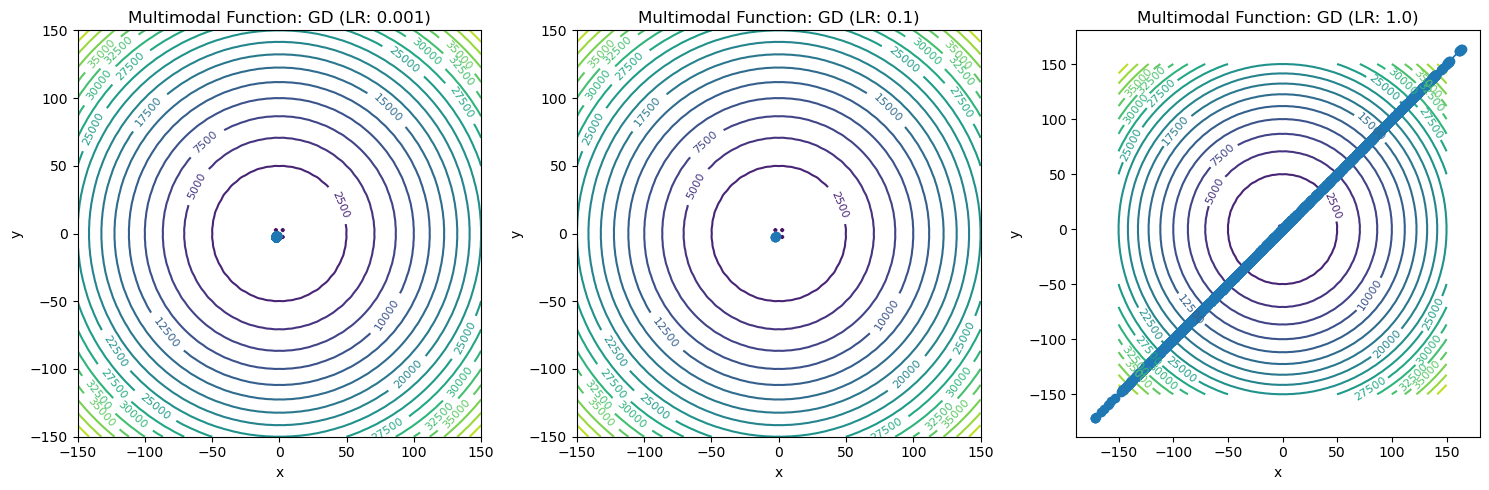

In [27]:
plot_three_contours_side_by_side([96, 98, 99], ylim=(-150, 150), xlim=(-150, 150))


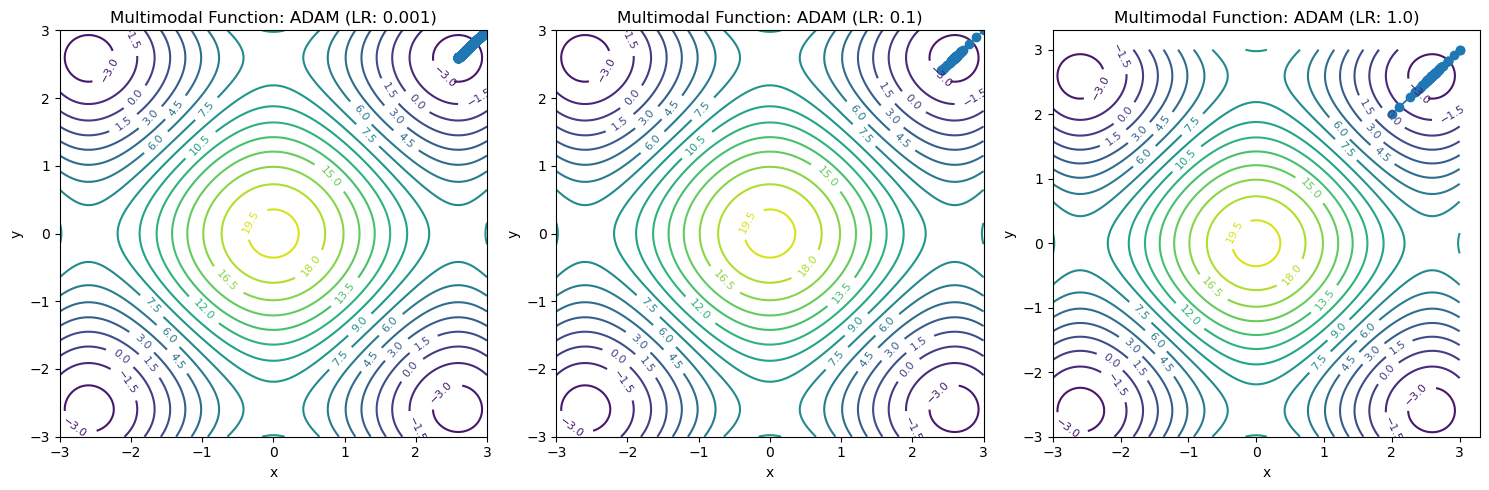

In [ ]:
plot_three_contours_side_by_side([96, 98, 99], ylim=(-150, 150), xlim=(-150, 150))



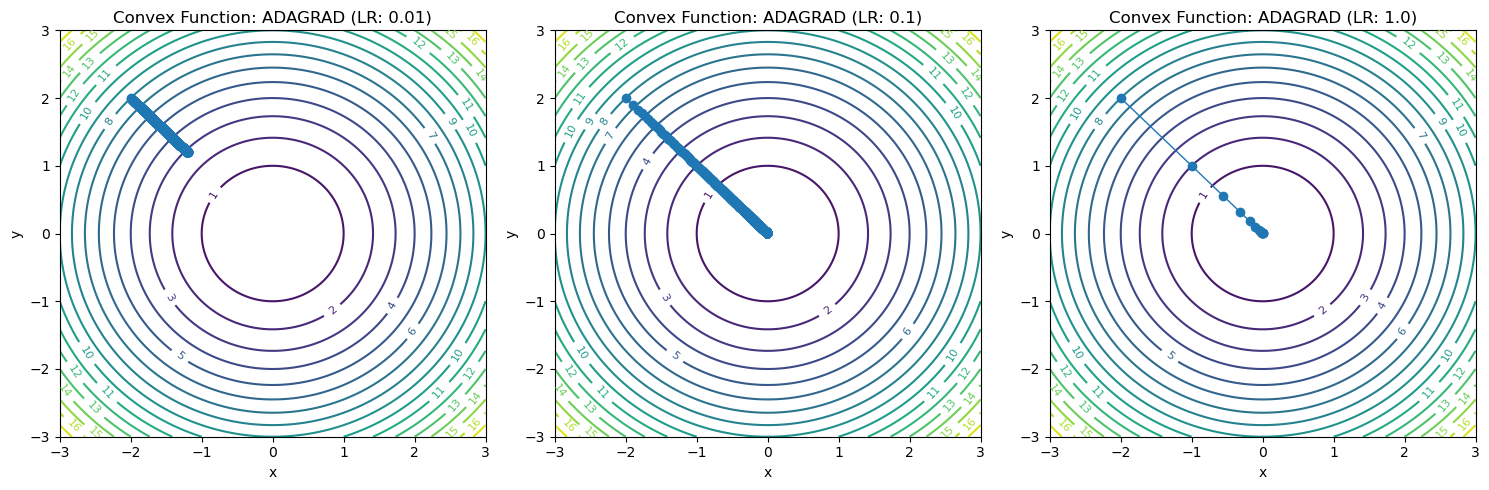

In [11]:

plot_three_contours_side_by_side([6,7,8])


In [ ]:
df_loaded



,experiment_id,timestamp,function,optimizer,learning_rate,start_point,start_x,start_y,final_point,final_x,final_y,final_value,iterations,runtime,converged,path,path_array
0,1,2025-09-17T21:32:40.160575,convex,gd,0.0010,"(-2, 2)",-2.0,2.0,"[-0.03648485044750143, 0.03648485044750143]",-0.036485,0.036485,0.002673,1999,0.005269,True,"[[-2.0, 2.0], [-1.996, 1.996], [-1.992008, 1.9...","[[-2.0, 2.0], [-1.996, 1.996], [-1.992008, 1.9..."
1,2,2025-09-17T21:32:40.161885,convex,gd,0.0100,"(-2, 2)",-2.0,2.0,"[-0.0035157482001922508, 0.0035157482001922508]",-0.003516,0.003516,0.000025,314,0.000795,True,"[[-2.0, 2.0], [-1.96, 1.96], [-1.9208, 1.9208]...","[[-2.0, 2.0], [-1.96, 1.96], [-1.9208, 1.9208]..."
2,3,2025-09-17T21:32:40.162036,convex,gd,0.1000,"(-2, 2)",-2.0,2.0,"[-0.0010141204801825839, 0.0010141204801825839]",-0.001014,0.001014,0.000002,34,0.000098,True,"[[-2.0, 2.0], [-1.6, 1.6], [-1.28, 1.28], [-1....","[[-2.0, 2.0], [-1.6, 1.6], [-1.28, 1.28], [-1...."
3,4,2025-09-17T21:32:40.162253,convex,newton,0.5000,"(-2, 2)",-2.0,2.0,"[0.0, 0.0]",0.000000,0.000000,0.000000,1,0.000192,True,"[[-2.0, 2.0], [0.0, 0.0]]","[[-2.0, 2.0], [0.0, 0.0]]"
4,5,2025-09-17T21:32:40.162312,convex,newton,1.0000,"(-2, 2)",-2.0,2.0,"[0.0, 0.0]",0.000000,0.000000,0.000000,1,0.000035,True,"[[-2.0, 2.0], [0.0, 0.0]]","[[-2.0, 2.0], [0.0, 0.0]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,104,2025-09-17T21:32:40.832725,multimodal,adagrad,0.1000,"(3, 3)",3.0,3.0,"[2.5963247317036813, 2.5963247317036813]",2.596325,2.596325,-3.617963,41,0.000350,True,"[[3.0, 3.0], [2.900000000217922, 2.90000000021...","[[3.0, 3.0], [2.900000000217922, 2.90000000021..."
104,105,2025-09-17T21:32:40.832832,multimodal,adagrad,1.0000,"(3, 3)",3.0,3.0,"[2.5955031490063276, 2.5955031490063276]",2.595503,2.595503,-3.617966,11,0.000089,True,"[[3.0, 3.0], [2.000000002179219, 2.00000000217...","[[3.0, 3.0], [2.000000002179219, 2.00000000217..."
105,106,2025-09-17T21:32:40.876316,multimodal,adam,0.0001,"(3, 3)",3.0,3.0,"[2.822612482552649, 2.822612482552649]",2.822612,2.822612,-3.056440,1999,0.042884,True,"[[3.0, 3.0], [2.999900000000218, 2.99990000000...","[[3.0, 3.0], [2.999900000000218, 2.99990000000..."
106,107,2025-09-17T21:32:40.898212,multimodal,adam,0.0010,"(3, 3)",3.0,3.0,"[2.5981923839170564, 2.5981923839170564]",2.598192,2.598192,-3.617903,1041,0.020394,True,"[[3.0, 3.0], [2.9990000000021793, 2.9990000000...","[[3.0, 3.0], [2.9990000000021793, 2.9990000000..."
